# **Supervised**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/BostonHousing.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

In [ ]:
df.shape

(506, 14)

In [ ]:
df.dtypes


,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [ ]:
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace = True)

for col in df.select_dtypes(include=["object"]):
  df[col] = df[col].fillna(df[col].mode()[0])

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["medv"])
y = df["medv"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R2 Score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))






R2 Score 0.6665030487253158
MAE 3.2114487155504516
MSE 24.456593109406477
RMSE 4.94536076635532


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.7173593273020187
MAE:  2.623333333333333
MSE:  20.72710980392157
RMSE:  4.552703570838054


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))



R2 Score:  0.8621759791029907
MAE:  2.395098039215686
MSE:  10.107156862745098
RMSE:  3.1791755004631463


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8902980084739964
MAE:  2.0563725490196085
MSE:  8.044862058823533
RMSE:  2.836346604141238


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100)

In [ ]:
y_pred_bagging = bagging_model.predict(X_test)

print("Bagging Regressor Result: ")
print("R2 Score: ", r2_score(y_test, y_pred_bagging))
print("MAE: ", mean_absolute_error(y_test, y_pred_bagging))
print("MSE: ", mean_squared_error(y_test, y_pred_bagging))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_bagging)))

Bagging Regressor Result: 
R2 Score:  0.8767177226578824
MAE:  2.1385784313725495
MSE:  9.040755794117652
RMSE:  3.0067849597398304


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting_model = AdaBoostRegressor(n_estimators=10)
boosting_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=10)

In [ ]:
y_pred_boost = boosting_model.predict(X_test)

print("Boosting Regressor Result: ")
print("R2 Score: ", r2_score(y_test, y_pred_boost))
print("MAE: ", mean_absolute_error(y_test, y_pred_boost))
print("MSE: ", mean_squared_error(y_test, y_pred_boost))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_boost)))

Boosting Regressor Result: 
R2 Score:  0.8702724204252255
MAE:  2.2854668576520454
MSE:  9.513414190450058
RMSE:  3.084382302901192


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

base_models = [
    ("tree", DecisionTreeRegressor()),
    ("svm", SVR())
]

stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('tree', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [ ]:
y_pred_stack = stacking_model.predict(X_test)

print("Stacking Regressor Result: ")
print("R2 Score: ", r2_score(y_test, y_pred_stack))
print("MAE: ", mean_absolute_error(y_test, y_pred_stack))
print("MSE: ", mean_squared_error(y_test, y_pred_stack))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_stack)))

Stacking Regressor Result: 
R2 Score:  0.8498007970493352
MAE:  2.2415419698479355
MSE:  11.014675780037393
RMSE:  3.318836509989215


# **Usupervised**

In [ ]:
X = df.drop(columns = ["medv"])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster_Label"] = kmeans.fit_predict(X_scaled)

In [ ]:
print(df["Cluster_Label"].value_counts())   # Check cluster counts


Cluster_Label
2    219
1    151
0    136
Name: count, dtype: int64


In [ ]:
print(df.groupby("Cluster_Label")["medv"].mean())


Cluster_Label
0    27.684559
1    16.154967
2    23.731050
Name: medv, dtype: float64


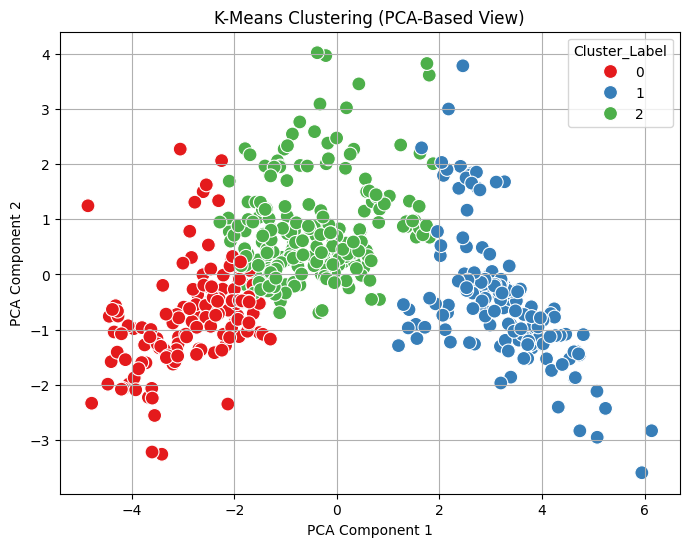

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: PCA transformation (if not done already)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled is your standardized X

# Step 2: Plot the PCA-reduced data with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df["Cluster_Label"],
    palette="Set1",
    s=100
)

plt.title("K-Means Clustering (PCA-Based View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
df["Cluster_Label"] = hc.fit_predict(X_scaled)

In [ ]:
cluster_profile = df.groupby("Cluster_Label").mean()

print(cluster_profile)

                    crim         zn      indus      chas       nox        rm  \
Cluster_Label                                                                  
0               0.932905   3.156425  12.993128  0.195531  0.591692  6.177318   
1              13.209833   0.000000  18.100000  0.000000  0.669605  5.984137   
2               0.115437  25.541872   5.246502  0.000000  0.451881  6.560207   

                     age       dis        rad         tax    ptratio  \
Cluster_Label                                                          
0              83.489385  2.900009   5.357542  360.597765  18.139106   
1              89.731452  2.074494  24.000000  666.000000  20.200000   
2              42.500493  5.635235   4.418719  292.793103  17.668966   

                        b      lstat       medv  Cluster Label  
Cluster_Label                                                   
0              370.232067  14.053799  22.341341       1.782123  
1              282.584032  19.172823  15.43

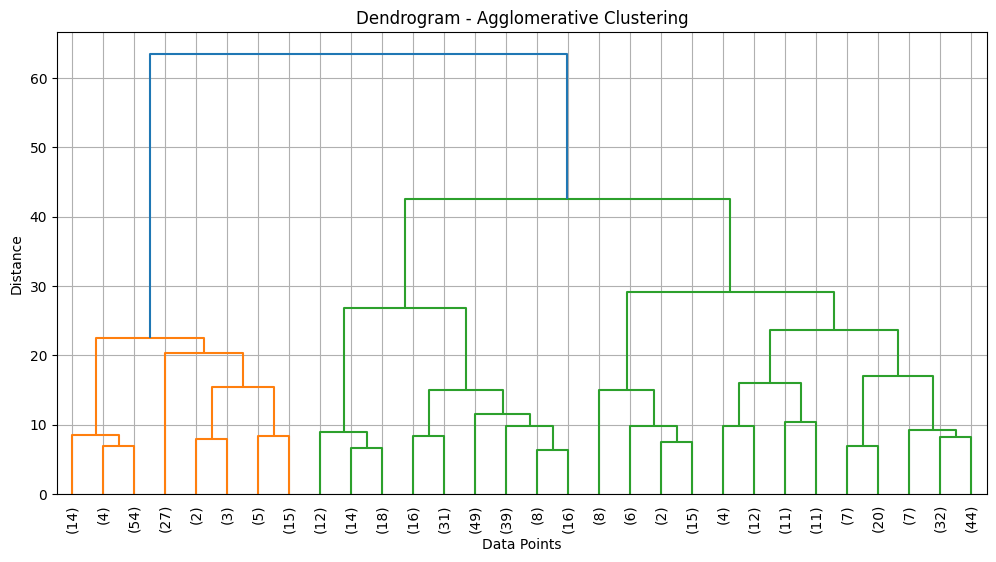

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


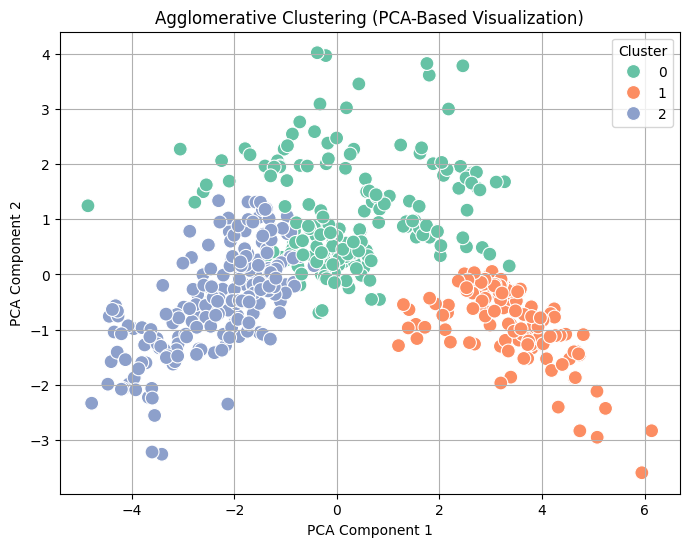

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df["Cluster_Label"],  # make sure column name is correct
    palette="Set2",
    s=100
)

plt.title("Agglomerative Clustering (PCA-Based Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
import numpy as np

# Create price categories based on medv
df["Price_Label"] = pd.cut(df["medv"], bins=[0, 20, 30, df["medv"].max()],
                           labels=["Low", "Mid", "High"])


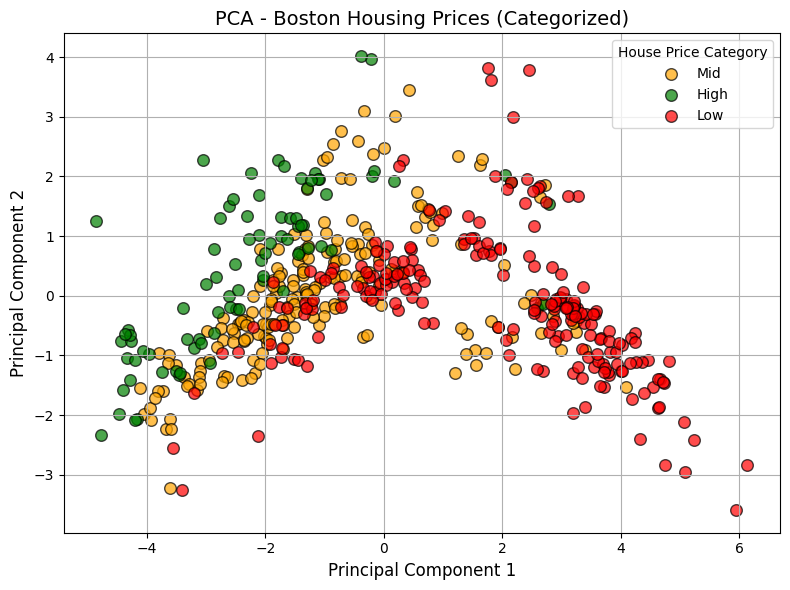

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create color map
color_map = {"Low": "red", "Mid": "orange", "High": "green"}

plt.figure(figsize=(8, 6))

for label in df["Price_Label"].unique():
    plt.scatter(
        X_pca[df["Price_Label"] == label, 0],
        X_pca[df["Price_Label"] == label, 1],
        label=label,
        color=color_map[label],
        edgecolor='k',
        alpha=0.7,
        s=70
    )

plt.title("PCA - Boston Housing Prices (Categorized)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="House Price Category")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Evaluation Matrics**

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/BostonHousing.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

In [ ]:
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

for col in df.select_dtypes(include=["object"]):
  df[col] = df[col].fillna(df[col].mode()[0])

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
X = df.drop(columns = ["medv"])
y = df["medv"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("Evaluation Metrics")
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# explained_var = explained_variance_score(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Evaluation Metrics
R2 Score: 0.6665
MAE: 3.2114
MSE: 24.4566
RMSE: 4.9454


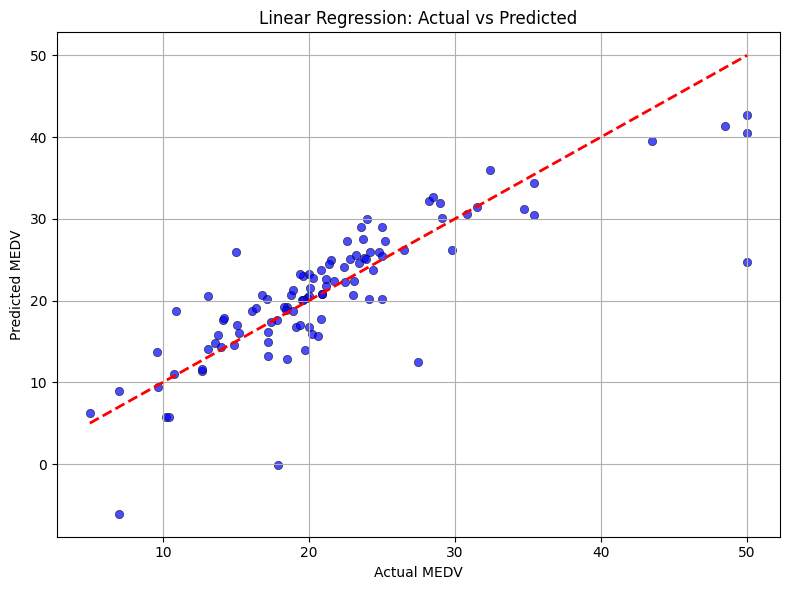

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", edgecolor="k", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


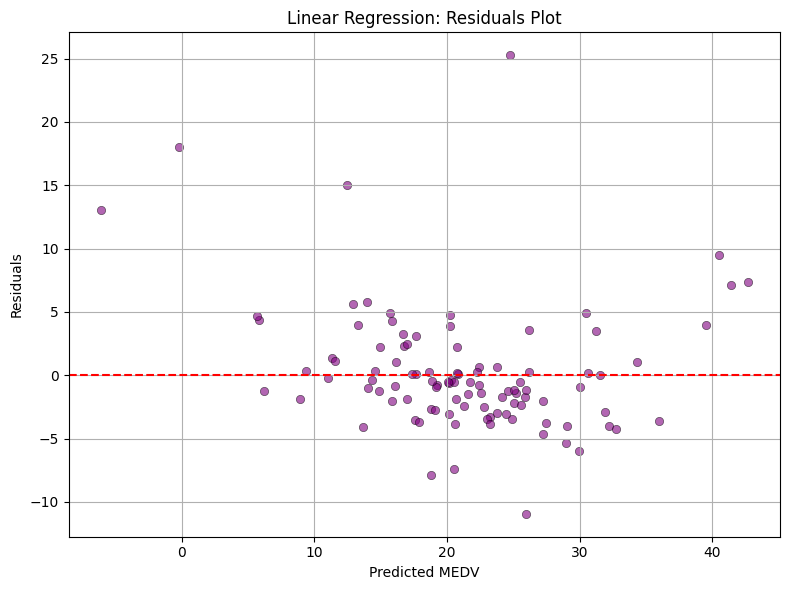

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color="purple", edgecolor="k", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Cross Validation And Hyperparameter Tunning**

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/BostonHousing.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

In [ ]:
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

for col in df.select_dtypes(include=["object"]):
  df[col] = df[col].fillna(df[col].mode()[0])

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns =["medv"])
y = df["medv"]

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
# r2_scores = []
# mae_scores = []
# rmse_scores = []

for train_index, test_index in kf.split(X):
  X_train ,X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  print(f"fold {fold} Results: ")
  print(f"R2 Score: {r2:.2f}")
  print(f"MAE: {mae:.4f}")
  print(f"RMSE: {rmse:.4f}\n")


  fold += 1

fold 1 Results: 
R2 Score: 0.67
MAE: 3.2114
RMSE: 4.9454

fold 2 Results: 
R2 Score: 0.73
MAE: 3.4406
RMSE: 4.5717

fold 3 Results: 
R2 Score: 0.71
MAE: 3.4478
RMSE: 5.1282

fold 4 Results: 
R2 Score: 0.77
MAE: 3.6958
RMSE: 4.8499

fold 5 Results: 
R2 Score: 0.69
MAE: 3.1769
RMSE: 4.7426



**GridSearchCV**

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/BostonHousing.csv"
df = pd.read_csv(file_path)

# print(df.info())
# print(df.head())

In [ ]:
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

for col in df.select_dtypes(include=["object"]):
  df[col] = df[col].fillna(df[col].mode()[0])

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["medv"])
y = df["medv"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


model = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 3, 5],
    "criterion": ["squared_error", "absolute_error"]  # for regression
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 3, 5],
                         'n_estimators': [10, 50, 100]})

In [ ]:
print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

import joblib
joblib.dump(grid_search.best_estimator_, "model.pkl")

Best Parameters: {'criterion': 'squared_error', 'max_depth': None, 'n_estimators': 100}

 Evaluation Metrics:
R² Score: 0.8903
MAE: 2.0564
RMSE: 2.8363


['model.pkl']

In [ ]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

model = RandomForestRegressor(random_state=42)

param_dist = {
    "n_estimators": np.arange(10, 200, 10),
    "max_depth": [None, 3, 5, 10],
    "criterion": ["squared_error", "absolute_error"]  # Regression-specific
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 3, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42)

In [ ]:
print("Best Parameters:", random_search.best_params_)

y_pred = random_search.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

Best Parameters: {'n_estimators': np.int64(160), 'max_depth': None, 'criterion': 'squared_error'}

 Evaluation Metrics:
R² Score: 0.8802
MAE: 2.0609
RMSE: 2.9645


# **Pycaret**

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.regression import *

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/BostonHousing.csv")

In [ ]:
print(data.isnull().sum())

data.fillna(data.median(numeric_only=True), inplace = True)

for col in data.select_dtypes(include = ["object"]):
  data[col] = data[col].fillna(data[col].mode()[0])

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
reg1 = setup(data=data, target="medv", session_id=123)
print(data.columns)

,Description,Value
0,Session id,123
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [ ]:
best_model = compare_models(include=["lr", "dt", "knn", "rf", "svm"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.2327,10.6234,3.1446,0.8671,0.1453,0.1133,0.4150
lr,Linear Regression,3.3089,22.7791,4.6491,0.7282,0.2528,0.1670,0.9200
dt,Decision Tree Regressor,3.0136,21.5184,4.3631,0.7137,0.2014,0.1515,0.0480
knn,K Neighbors Regressor,4.8535,47.4316,6.7452,0.4225,0.2611,0.2270,0.0510
svm,Support Vector Regression,5.3517,67.5055,8.0238,0.2094,0.3107,0.2390,0.0320


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0711,9.5413,2.9455,0.8869,0.1316,0.1016,0.2090
gbr,Gradient Boosting Regressor,2.1591,9.4414,3.0005,0.8811,0.1433,0.1118,0.2470
rf,Random Forest Regressor,2.2327,10.6234,3.1446,0.8671,0.1453,0.1133,0.3220
lightgbm,Light Gradient Boosting Machine,2.3473,11.7101,3.3207,0.8538,0.1490,0.1167,0.2840
xgboost,Extreme Gradient Boosting,2.5067,13.7505,3.6174,0.8298,0.1565,0.1228,0.2060
ada,AdaBoost Regressor,2.9031,16.3844,3.9144,0.7992,0.1831,0.1534,0.1260
ridge,Ridge Regression,3.2872,22.8962,4.6530,0.7287,0.2461,0.1667,0.0260
lr,Linear Regression,3.3089,22.7791,4.6491,0.7282,0.2528,0.1670,0.0250
br,Bayesian Ridge,3.3243,23.3315,4.6949,0.7246,0.2454,0.1676,0.0450
lar,Least Angle Regression,3.3519,23.1089,4.7015,0.7200,0.2668,0.1734,0.0490


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(best_model)

In [ ]:
prediction = predict_model(final_model, data=data)
prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,prediction_label
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001,36.200001


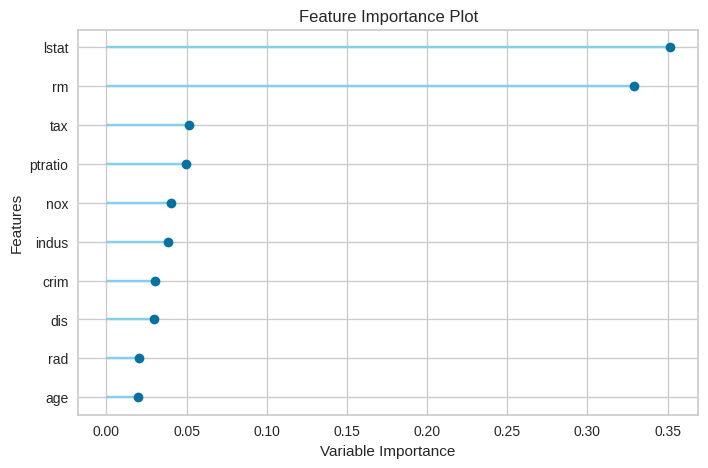

In [ ]:
plot_model(estimator=final_model, plot="feature")